In [ ]:
# preprocess

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [ ]:
# Load train and test datasets
train_df = pd.read_csv("D:/codsoft/Credit Card Fraud Detection/archive/fraudTrain.csv")
test_df = pd.read_csv("D:/codsoft/Credit Card Fraud Detection/archive/fraudTest.csv")

# Select features and target
cols_to_use = ['amt', 'category', 'gender', 'state', 'lat', 'long', 'job', 'dob', 'is_fraud']
train_df = train_df[cols_to_use].dropna()
test_df = test_df[cols_to_use].dropna()

In [ ]:


# Convert dob to age
train_df['dob'] = pd.to_datetime(train_df['dob'], errors='coerce')
test_df['dob'] = pd.to_datetime(test_df['dob'], errors='coerce')
train_df['age'] = 2025 - train_df['dob'].dt.year
test_df['age'] = 2025 - test_df['dob'].dt.year
train_df.drop('dob', axis=1, inplace=True)
test_df.drop('dob', axis=1, inplace=True)

# One-hot encode categorical variables
cat_cols = ['category', 'gender', 'state', 'job']
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)

In [ ]:

# Align test set to train columns
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Save to files
joblib.dump(X_train_scaled, 'X_train.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(X_test_scaled, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(" Preprocessing complete and files saved.")

 Preprocessing complete and files saved.


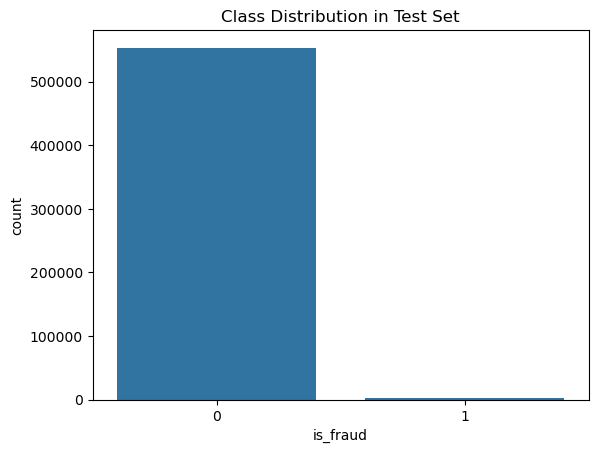

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.show()
